# A note on resampling av unevenly sampled data

In [1]:
import numpy as np

from scipy import signal as spsp

from scipy import interpolate as spint 

from matplotlib import pyplot as plt

0.019999264882437712
0.02199926488243771


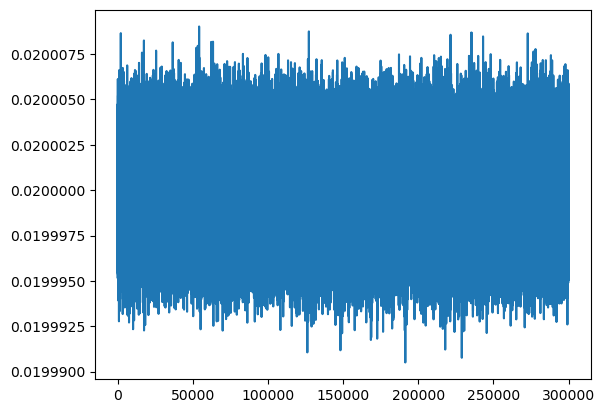

In [7]:
fs = 50

dt = np.random.normal(1/fs,1/(10000*fs),6000*fs)

plt.figure()
plt.plot(dt)

t = np.cumsum(dt)

t_master = np.arange(t[0],np.max(t),1/fs) + 0.1 * 1/fs

print(t[0])
print(t_master[0])







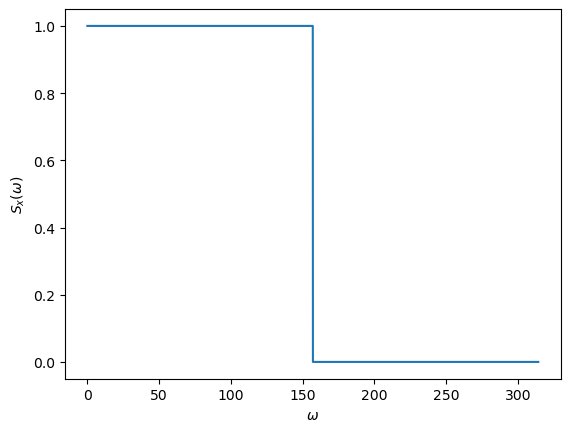

In [8]:
import numpy as np
from matplotlib import pyplot as plt
w1 = 0 # Low cut-off frequency
w2 = fs*np.pi  # Low cut-off frequency
w = np.linspace(0.00001,2*np.pi*fs,10000); # Frequency axis
Sx = np.ones(w.shape[0]) # Value of the auto-spectral density
Sx[w<w1] = 0 # Set the auto-spectral density to zero below w1
Sx[w>w2] = 0 # Set the auto-spectral density to zero above w2

plt.figure()
plt.plot(w,Sx);
plt.ylabel('$S_x(\omega)$');
plt.xlabel('$\omega$');

(200.0, 201.0)

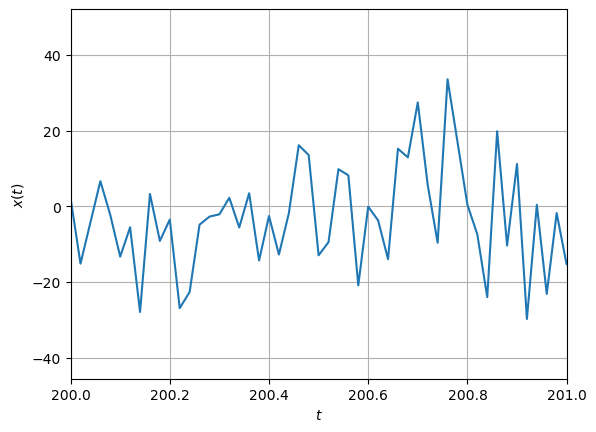

In [9]:
phi = np.random.rand(w.shape[0])*2*np.pi # Random phase angles 
x = np.zeros(t.shape[0]) # Initialize the vector of x values
domega = w[1]-w[0] # Frequency spacing
for k in range(w.shape[0]):
    Ak = (2*Sx[k]*domega)**0.5 #Amplitude
    x = x + Ak * np.cos(w[k]*t+ phi[k]) # Sum the contibution from each harmonic component
    
plt.figure()
plt.plot(t,x);
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.xlim(200,201)


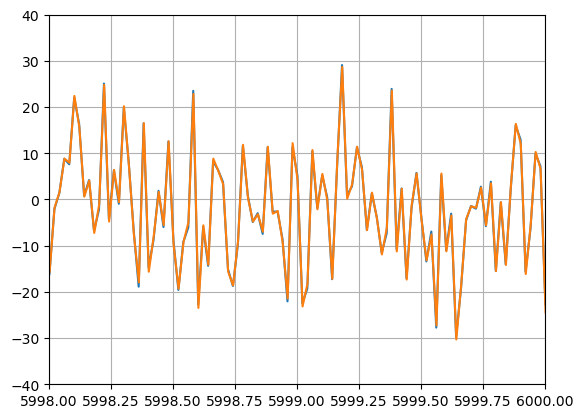

In [10]:
spline = spint.CubicSpline(t,x)

plt.figure()
plt.plot(t,x)
plt.plot(t_master,spline(t_master))
plt.plot()
plt.xlim(5998,6000)
plt.ylim(-40,40)
plt.grid()

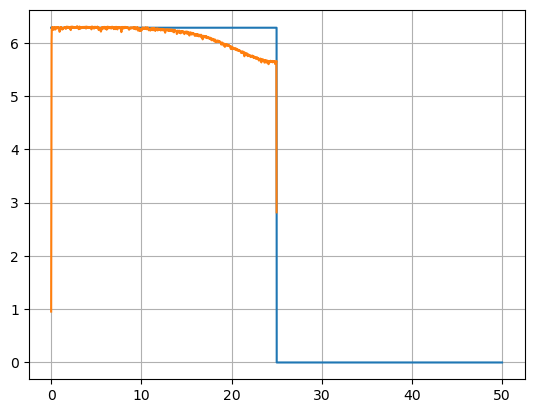

In [11]:
Ndivisions=200 # Number of divisions of the time series (total segments)
Nwindow=np.ceil(len(t_master)/Ndivisions) # Length of window/segment
dt = t_master[1]-t_master[0]
Nfft_pow2 = 2**(np.ceil(np.log2(Nwindow))) # Next power of 2 for zero padding

# Call welch from scipy signal processing
f, Sx_welch=spsp.welch(spline(t_master), fs=1/dt, window='hann', nperseg=Nwindow, noverlap=None, nfft=Nfft_pow2, detrend='constant', return_onesided=True, scaling='density', axis=- 1, average='mean')


plt.figure()
plt.plot(w/2/np.pi,2*np.pi*Sx)
plt.plot(f,Sx_welch)
plt.grid()

